In [1]:
import sys
sys.dont_write_bytecode = True

from typing import Callable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from lib.gradient_descent import descenso_gradiente_multi

pd.set_option('display.precision', 4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(formatter={'all': lambda x: '%.4f' % x})

%matplotlib inline

In [2]:
dataset = pd.read_csv('./data/position_salaries.csv')

dataset['Level'] = (
    dataset['Level'] - dataset['Level'].mean()
) / dataset['Level'].std()

dataset['Salary'] = (
    dataset['Salary'] - dataset['Salary'].mean()
) / dataset['Salary'].std()

dataset.head()

,Position,Level,Salary
0,Business Analyst,-1.4863,-0.6831
1,Junior Consultant,-1.1560,-0.6664
2,Senior Consultant,-0.8257,-0.6330
3,Manager,-0.4954,-0.5662
4,Country Manager,-0.1651,-0.4660


In [3]:
x = dataset[['Level']].to_numpy()
y = dataset[['Salary']].to_numpy()

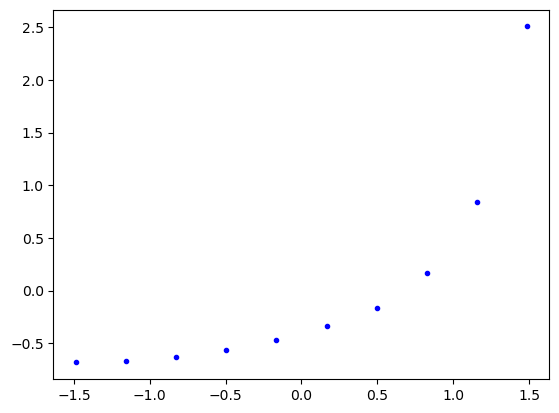

In [4]:
plt.plot(x, y, 'b.')
plt.show()

In [5]:
def expand_data_poly(x, grade = 2): 
    return np.column_stack(tuple(x**i for i in range(1, grade + 1)))

h = lambda theta, x: np.dot(x, theta)
j = lambda theta, x, y: np.sum(np.dot(np.transpose(x), (h(theta, x) - y)) ** 2) / (2 * y.shape[0])

def print_result(method_name: str, result: dict = {}) -> None:
    if not result: 
        return None
    theta_v = result['theta']
    iters = result['iters']
    error = result['current_error']
    print(f'Method: {method_name} [iters: {iters}, thetas: {np.array(theta_v).reshape(theta_v.shape[0])}, error: {error:.6f}]')

In [6]:
x_exp = expand_data_poly(x, 4)

In [7]:
result = descenso_gradiente_multi(
    x_exp,
    y,
    fn = h,
    cost_fn = j,
    alpha = 0.05,
    error = 0.001,
    max_iter = 10000,
)

In [8]:
print_result('Polynomial', result)

Method: Polynomial [iters: 84, thetas: [-0.3512 0.4305 0.1973 0.2584 0.1552], error: 0.000983]


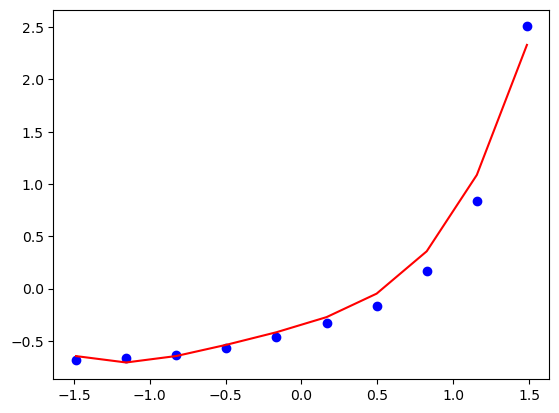

In [9]:
%matplotlib inline

x_p = np.column_stack((np.ones(x_exp.shape[0]), x_exp))

plt.figure()
plt.scatter(x, y, color = 'blue')
plt.plot(x, h(result['theta'], x_p), 'r-')
plt.show()

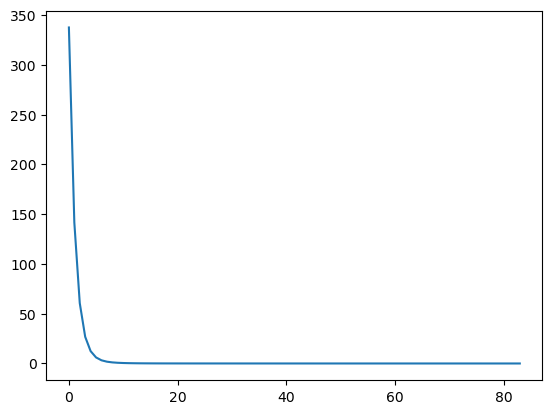

In [13]:
plt.plot(list(range(0, result['iters'])), result['errors'])
plt.show()